In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from prophet.serialize import model_from_json

from pandas import CategoricalDtype
from bs4 import BeautifulSoup
from datetime import date
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from scipy import stats
from prophet.diagnostics import cross_validation, performance_metrics

import sys
import os

backend_path = os.path.abspath('../backend')
sys.path.append(backend_path)
from get_metrics import get_metrics

In [4]:
# Чтение модели из JSON файла

with open('../backend/final_test_model.json', 'r') as fin:
    final_test_model = model_from_json(fin.read())  # Load model

In [5]:
# Чтение DataFrame df в файл data/df.csv
df = pd.read_csv('../data/df.csv')

# Чтение DataFrame df_train в файл data/df_train.csv
df_train = pd.read_csv('../data/df_train.csv')

# Чтение DataFrame df_test в файл data/df_test.csv
df_test = pd.read_csv('../data/df_test.csv')

In [6]:
# Преобразование столбца ds в формат datetime
df['ds'] = pd.to_datetime(df['ds'], format='%Y-%m-%d', dayfirst=True)
df_train['ds'] = pd.to_datetime(df_train['ds'], format='%Y-%m-%d', dayfirst=True)
df_test['ds'] = pd.to_datetime(df_test['ds'], format='%Y-%m-%d', dayfirst=True)

# Baseline Prophet

In [8]:
prophet_baseline = Prophet()
prophet_baseline.fit(df)

02:12:23 - cmdstanpy - INFO - Chain [1] start processing
02:12:23 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
future = prophet_baseline.make_future_dataframe(periods=90)
future.tail()

,ds
2727,2024-07-17
2728,2024-07-18
2729,2024-07-19
2730,2024-07-20
2731,2024-07-21


In [12]:
forecast = prophet_baseline.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2727,2024-07-17,12.914599,10.363808,15.482985
2728,2024-07-18,12.901767,10.493664,15.343057
2729,2024-07-19,12.890086,10.311562,15.237727
2730,2024-07-20,13.623979,11.240655,16.118497
2731,2024-07-21,13.627943,11.118151,16.113332


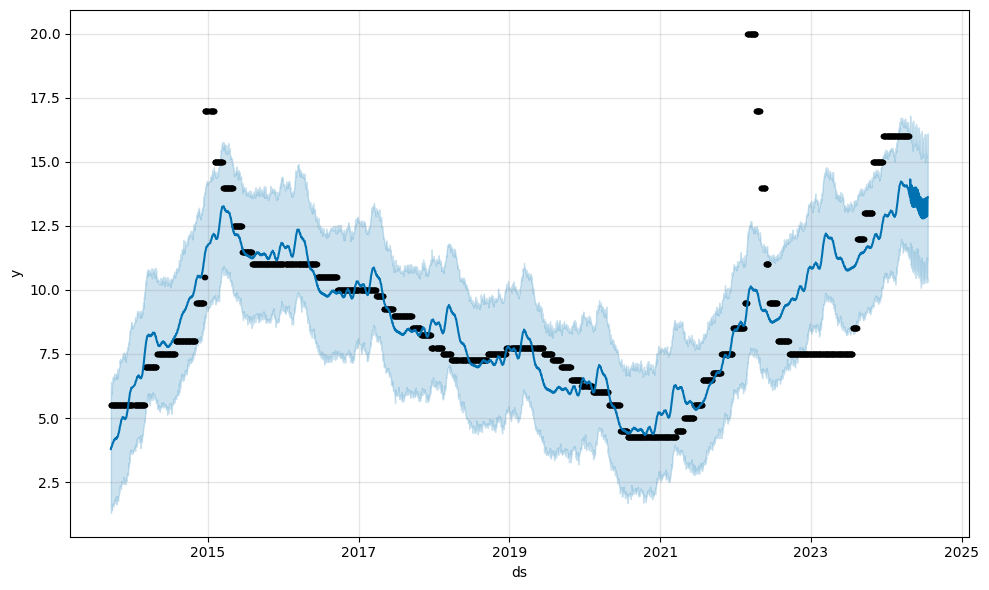

In [13]:
fig1 = prophet_baseline.plot(forecast)

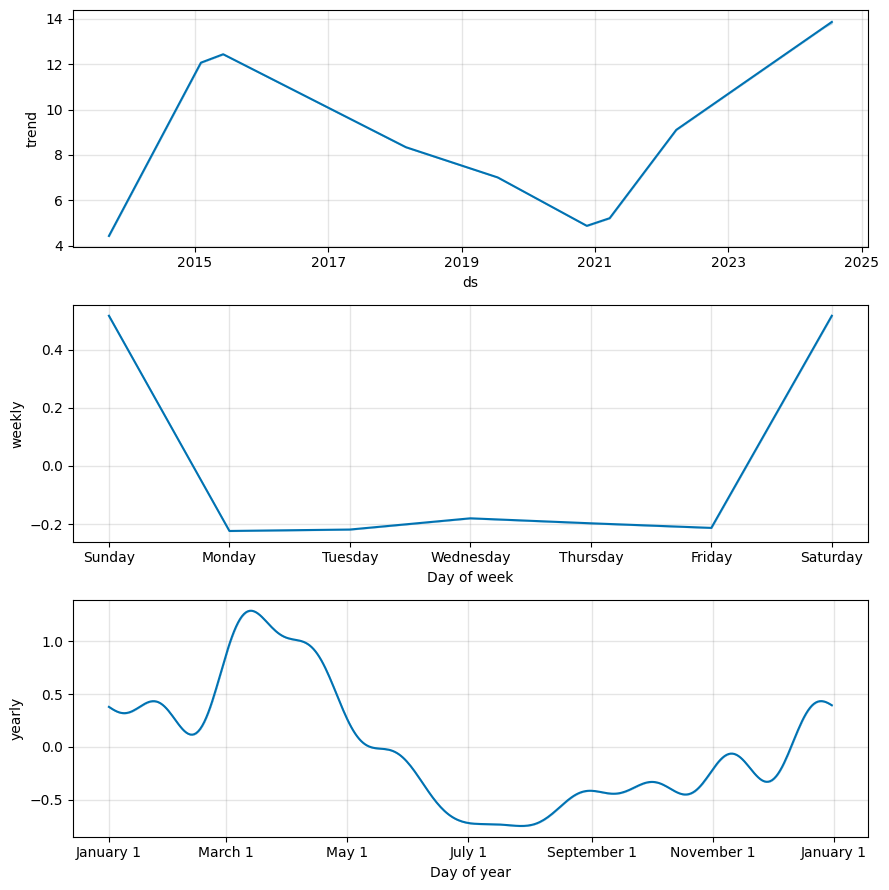

In [15]:
fig2 = prophet_baseline.plot_components(forecast)

# Final test model Prophet

# Tuning Prophet

## Hyperparameter tuning